# AUDIO ANALYSIS

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
!pip install SpeechRecognition

     |████████████████████████████████| 32.8MB 113kB/s 


In [5]:
!pip install pydub

In [6]:
#!pip install --upgrade keras

In [7]:
#!pip install --upgrade tensorflow

In [8]:
import librosa
import librosa.display 
import IPython.display as ipd
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


In [9]:
sample_match='/content/drive/MyDrive/Capstone_606/Data/Sample_data/cricket/powerplay _use.wav'
sample_highlight='/content/drive/MyDrive/Capstone_606/Data/Sample_data/short_demo.mp4'
sample_movie='/content/drive/MyDrive/Capstone_606/Data/Sample_data/Must_movie_clip.mp4'

In [10]:
def audio_stats(file_name):
  file_aud,sr=librosa.load(file_name,mono=True)
  time_of_sample=1/sr
  print("Length of samples collected from audio",file_aud.size)
  print(f"Duration of each sample: {time_of_sample:6f} seconds" )
  print(f"Duration of audio signal is: {len(file_aud)*time_of_sample:1f} in seconds")

In [11]:
import warnings
warnings.filterwarnings("ignore")
for i in [sample_match,sample_highlight,sample_movie]:
  audio_stats(i)

Length of samples collected from audio 683153
Duration of each sample: 0.000045 seconds
Duration of audio signal is: 30.981995 in seconds
Length of samples collected from audio 295424
Duration of each sample: 0.000045 seconds
Duration of audio signal is: 13.397914 in seconds
Length of samples collected from audio 1574912
Duration of each sample: 0.000045 seconds
Duration of audio signal is: 71.424580 in seconds


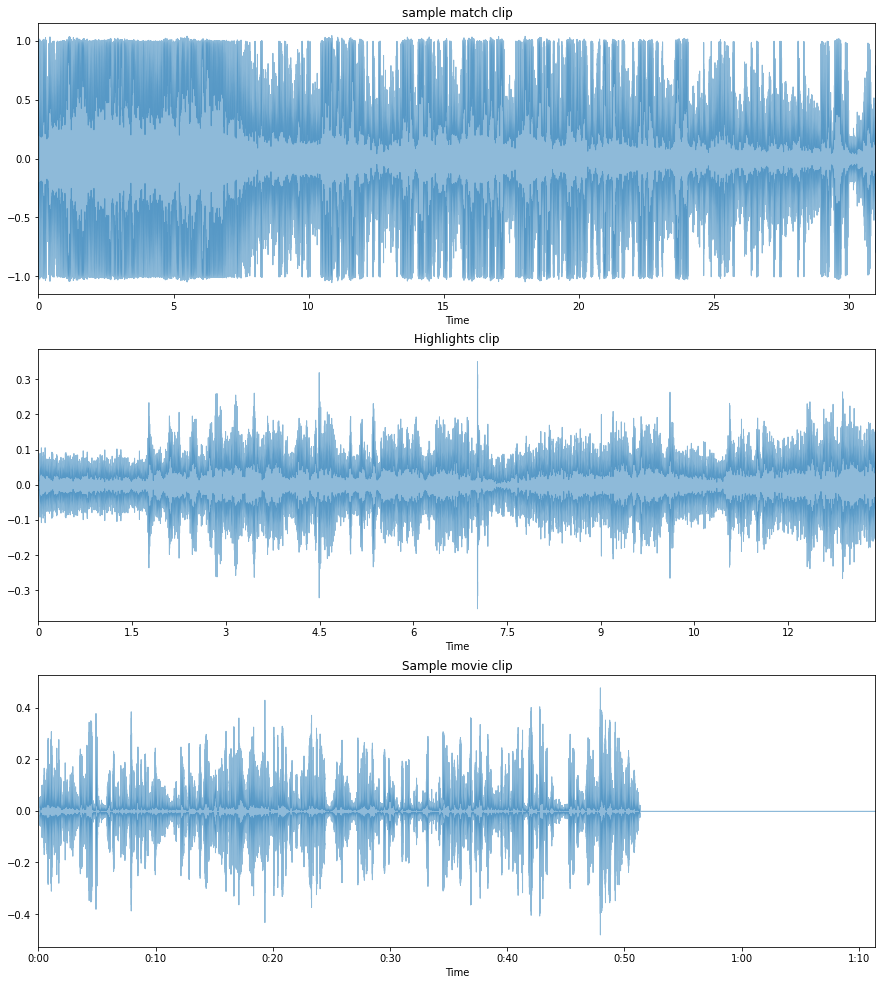

In [12]:
plt.figure(figsize=(15,17))
plt.subplot(3,1,1)
match,srm=librosa.load(sample_match,mono=True)
librosa.display.waveplot(match,alpha=0.5)
plt.title("sample match clip")

plt.subplot(3,1,2)
highlight,srh=librosa.load(sample_highlight,mono=True)
librosa.display.waveplot(highlight,alpha=0.5)
plt.title("Highlights clip")


plt.subplot(3,1,3)
movie,srmo=librosa.load(sample_movie,mono=True)
librosa.display.waveplot(movie,alpha=0.5)
plt.title("Sample movie clip")


plt.show()

In [13]:
def amplitude_level(signal, frame_size,hop_length):

  amp_levels=[]
  
  for i in range(0,len(signal),hop_length):
    each_frame_amp_level=max(signal[i:i+frame_size])
    amp_levels.append(each_frame_amp_level)
  return np.array(amp_levels)

In [14]:
FS=1024
HL=512

In [15]:
match_al=amplitude_level(match,FS,HL)
highlight_al=amplitude_level(highlight,FS,HL)
movie_al=amplitude_level(movie,FS,HL)

In [16]:
frms_match=range(0,match_al.size)
time_match=librosa.frames_to_time(frms_match,hop_length=HL)

frms_highlight=range(0,highlight_al.size)
time_highlight=librosa.frames_to_time(frms_highlight,hop_length=HL)


frms_movie=range(0,movie_al.size)
time_movie=librosa.frames_to_time(frms_movie,hop_length=HL)

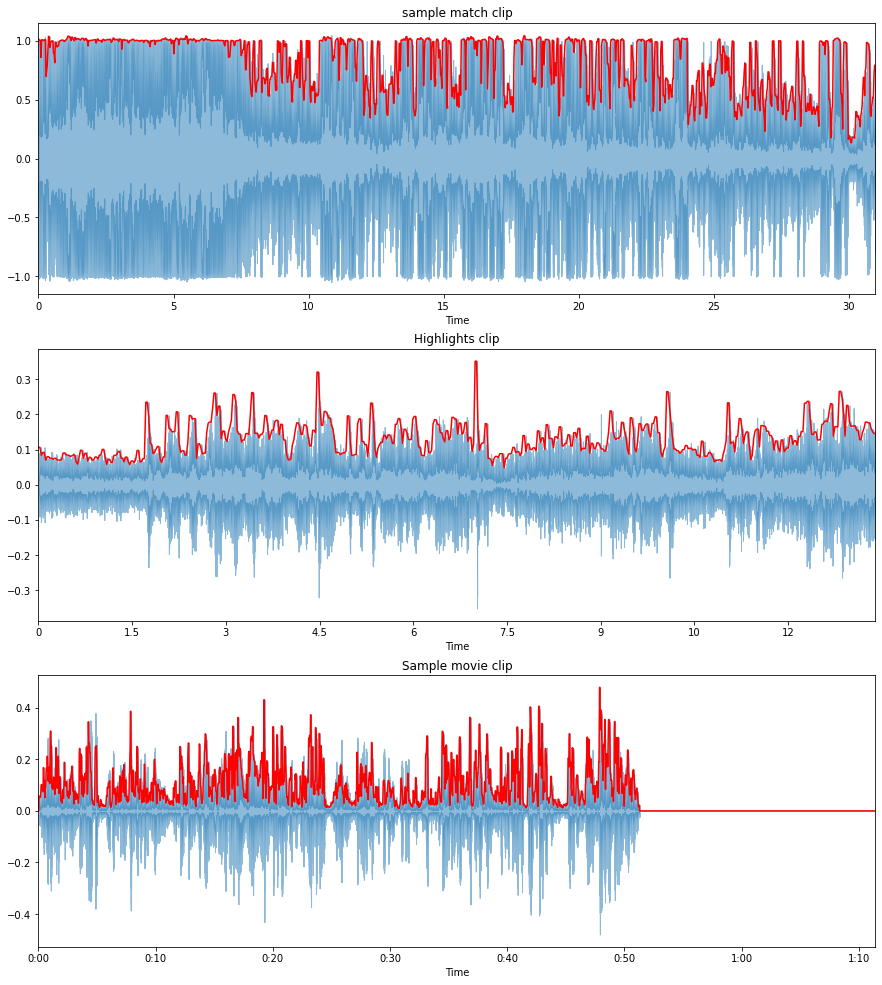

In [17]:
plt.figure(figsize=(15,17))
plt.subplot(3,1,1)
match,srm=librosa.load(sample_match,mono=True)
librosa.display.waveplot(match,alpha=0.5)
plt.plot(time_match,match_al,color='r')
plt.title("sample match clip")

plt.subplot(3,1,2)
highlight,srh=librosa.load(sample_highlight,mono=True)
librosa.display.waveplot(highlight,alpha=0.5)
plt.plot(time_highlight,highlight_al,color='r')
plt.title("Highlights clip")


plt.subplot(3,1,3)
movie,srmo=librosa.load(sample_movie,mono=True)
librosa.display.waveplot(movie,alpha=0.5)
plt.plot(time_movie,movie_al,color='r')
plt.title("Sample movie clip")


plt.show()

In [19]:
import os
lst=os.listdir('/content/drive/MyDrive/Capstone_606/Data/DATA_img/multi_stand/model_train')
len(lst)


256

In [20]:
data1_list=os.listdir('/content/drive/MyDrive/Capstone_606/Data/DATA_img/Data_main/Binary_Class')

# EDA for Image Data

In [21]:
ump_count=0
non_umpire_count=0
for i in data1_list:
  if i[0:3]=='ump':
    ump_count=ump_count+1
  elif i[0:3]=='non':
    non_umpire_count=non_umpire_count+1

{'Umpire': 240, 'Non Umpire': 213}


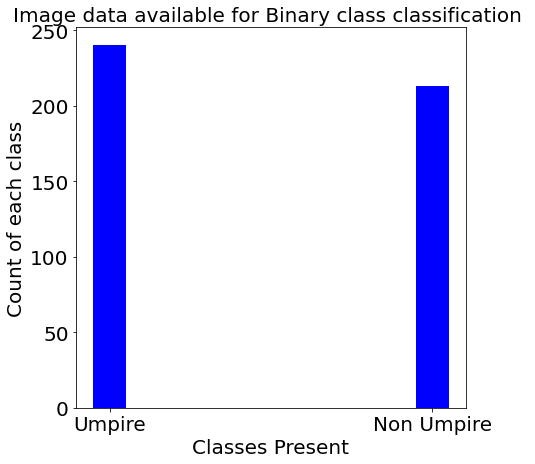

In [22]:
import matplotlib.pyplot as plt
imd_dict={"Umpire":ump_count,"Non Umpire":non_umpire_count}
keys = imd_dict.keys()
values = imd_dict.values()
print(imd_dict)
plt.figure(figsize=(7,7))
plt.title("Image data available for Binary class classification ",fontsize=20)
plt.bar(keys, values,color='blue',width=0.1)
plt.xlabel("Classes Present",fontsize=20)
plt.ylabel("Count of each class",fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.show()

In [23]:
data2_list=os.listdir('/content/drive/MyDrive/Capstone_606/Data/DATA_img/Data_main/Multi_class')

In [24]:
dict_multi={}
six_list=[]
wide_list=[]
noball_list=[]
out_list=[]
for j in data2_list:
  if j[0:3]=='no_':
    noball_list.append(j)
  elif j[0:3]=='six':
    six_list.append(j)
  elif j[0:3]=='wid':
    wide_list.append(j)
  else:
    out_list.append(j)
dict_multi["No Ball"]=len(noball_list)
dict_multi["Out"]=len(out_list)
dict_multi["Six"]=len(six_list)
dict_multi["Wide"]=len(wide_list)


{'No Ball': 78, 'Out': 78, 'Six': 78, 'Wide': 78}


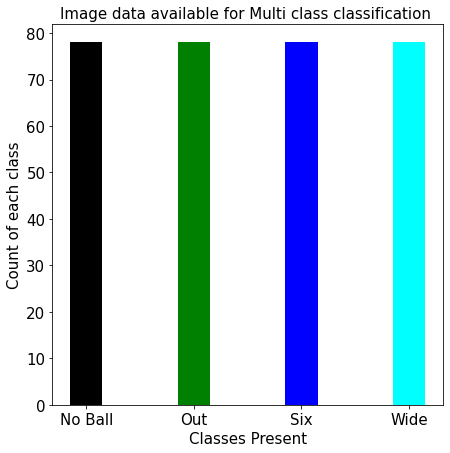

In [25]:
keys1 = dict_multi.keys()
values1 = dict_multi.values()
print(dict_multi)
plt.figure(figsize=(7,7))
plt.title("Image data available for Multi class classification ",fontsize=15)
plt.bar(keys1, values1,width=0.3,color=['black', 'green', 'blue', 'cyan'])
plt.xlabel("Classes Present",fontsize=15)
plt.ylabel("Count of each class",fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()


# Feature Extraction for Binary and Multi class images data

In [1]:
import os
import glob
import time
import numpy as np
from keras.applications.vgg19 import preprocess_input
from keras.models import Model
from keras.preprocessing import image
from keras import applications
from sklearn.metrics import accuracy_score
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.svm import LinearSVC

**Feature extraction from Image data , Including labels attached**

Preprocessing of Image

In [2]:
def img_preProcess(img):
  pp1=image.img_to_array(img)
  pp1=np.expand_dims(pp1, axis=0)
  pp1=preprocess_input(pp1)
  return pp1

Feature extraction for Binary Classification [ Umpire , Non-Umpire]

In [5]:
base_model = applications.vgg19.VGG19(include_top=True, weights='imagenet', input_tensor=None, 
                                      input_shape=None, pooling=None, classes=1000)
data_path_binary = '//content/drive/MyDrive/Capstone_606/Data/DATA_img/Data_main/Binary_Class'
feat_save_path = '/content/drive/MyDrive/Capstone_606/Features'
class_binary = ['non_umpire', 'umpire']
model = Model(base_model.input,base_model.get_layer('fc1').output)
for cls in range(1, 3):
    feats_binary=[]
    for image_path in glob.glob(f'{data_path_binary}/{class_binary[cls-1]}*'):
        img = image.load_img(image_path, target_size=(224, 224))
        img_proc=img_preProcess(img)
        features = model.predict(img_proc)
        features = features.flatten()
        feats_binary.append(features)
    feature_binary = np.squeeze(np.asarray(feats_binary))
    labels_binary = np.ones(len(feature_binary))*cls
    feature_binary = np.column_stack((feature_binary, labels_binary))
        #Save the features as numpy array for further processing
    np.save(f'{feat_save_path}/new_Model_vgg19_features_{class_binary[cls-1]}.npy',feature_binary)
print("Saved features for Binary class")

Saved features for Binary class


In [35]:
ump_feat=np.load('/content/drive/MyDrive/Capstone_606/Features/new_Model_vgg19_features_umpire.npy')
non_ump_feat=np.load('/content/drive/MyDrive/Capstone_606/Features/new_Model_vgg19_features_non_umpire.npy')
umpire_labels=ump_feat[:, (ump_feat.shape[1]-1)]
nonump_labels=non_ump_feat[:, (non_ump_feat.shape[1]-1)]
print("Label for umpire Class","  ",str(umpire_labels[0]))
print("Label for Non umpire Class","  ",str(nonump_labels[0]))

Label for umpire Class    2.0
Label for Non umpire Class    1.0


In [13]:
classes_multi=['no_ball', 'out', 'sixes', 'wide', 'no_action']
save_path_feat='/content/drive/MyDrive/Capstone_606/Features'
#layers_to_extract=['fc1']
data_path='/content/drive/MyDrive/Capstone_606/Data/DATA_img/model2_train'
#for layer_num in range(0, len(layers_to_extract)):
model = Model(base_model.input,base_model.get_layer('fc1').output)
for class_multi in range(1, len(classes_multi)+1):
  feats_multi=[]
  for image_path in glob.glob(f'{data_path}/{classes_multi[class_multi-1]}*'):
    img = image.load_img(image_path, target_size=(224, 224))
    img_proc=img_preProcess(img)
    features_multi = model.predict(img_proc)
    features_multi = features_multi.flatten()
    feats_multi.append(features_multi)
  feature_list_multi = np.squeeze(np.asarray(feats_multi))
  labels_multi = np.ones(len(feature_list_multi))*class_multi
  feature_list_multi = np.column_stack((feature_list_multi, labels_multi))
  np.save(f'{save_path_feat}/new_{classes_multi[class_multi-1]}_feat.npy',feature_list_multi)

In [52]:
dict_multi_feat={}
No_ball=np.load('/content/drive/MyDrive/Capstone_606/Features/new_no_ball_feat.npy')
out=np.load('/content/drive/MyDrive/Capstone_606/Features/new_out_feat.npy')
six=np.load('/content/drive/MyDrive/Capstone_606/Features/new_sixes_feat.npy')
wide=np.load('/content/drive/MyDrive/Capstone_606/Features/new_wide_feat.npy')
No_Action=np.load('/content/drive/MyDrive/Capstone_606/Features/new_no_action_feat.npy')
feat_lst=list([No_ball,out,six,wide,No_Action])
evnt_lst=['No Ball','Out','Six','Wide','No Action']
for i in range(0,len(feat_lst)):
  labels = feat_lst[i][:, (feat_lst[i].shape[1]-1)]
  print("Label For "+evnt_lst[i]+' is '+" "+str(labels[0]))

Label For No Ball is  1.0
Label For Out is  2.0
Label For Six is  3.0
Label For Wide is  4.0
Label For No Action is  5.0


Feature extraction for Multi-class Classification of Umpire actions [No ball, Six, Out, Six, no Action]

# Train and Evaluation of Model with the Help of extracted features.

Trainig Binary Classification model - Umpire or No umpire in the image

In [54]:
dict_binary={}
feature_path = '/content/drive/MyDrive/Capstone_606/Features'
model_save_path = '/content/drive/MyDrive/Capstone_606/Features/Models'
non_umpire = np.load('/content/drive/MyDrive/Capstone_606/Features/new_Model_vgg19_features_non_umpire.npy')
umpire = np.load('/content/drive/MyDrive/Capstone_606/Features/new_Model_vgg19_features_umpire.npy')
X_data = np.append(non_umpire, umpire, axis=0)
labels = X_data[:, (X_data.shape[1]-1)]
train_data = X_data[:, 0:(X_data.shape[1]-1)]
#Split
x_tr,x_ts,y_tr,y_ts = train_test_split(train_data, labels, test_size=0.2, random_state=145) 
clf = LinearSVC(C=10,max_iter=50000)
clf = clf.fit(x_tr, y_tr)
predictions_tr = (clf.predict(x_ts))
cross_scores = cross_val_score(clf, x_tr, y_tr, cv=10)
train_acc_binary=cross_scores.mean()*100
dict_binary["Train_Accuracy"]=train_acc_binary
test_acc_binary = accuracy_score(y_ts, predictions_tr)
test_acc_binary=test_acc_binary*100
dict_binary["Test_Accuracy"]=test_acc_binary
y_score =clf.decision_function(x_ts)
average_precision = average_precision_score(y_ts, y_score)
print("Average precision-recall score",average_precision)
print(dict_binary)

Average precision-recall score 0.26810904663493274
{'Train_Accuracy': 95.30030030030028, 'Test_Accuracy': 95.6043956043956}


Significant Scores of accuracy , so saving the model

In [11]:
import pickle
pickle.dump(clf, open(f'{model_save_path}/new_binary_class_vgg19model_svm.sav', 'wb'))

In [12]:
os.listdir('/content/drive/MyDrive/Capstone_606/Features/Models')

['signal_model_vgg19_svm.sav',
 'binary_class_vgg19model_svm.sav',
 'multi_class_vgg19model_vgg19_svm.sav',
 'new_binary_class_vgg19model_svm.sav']

Training Multi-class clssification model - Umpire Signal -[No ball, Six, Out, Six, no Action]

In [17]:
dict_multi={}
feature_path = ('/content/drive/MyDrive/Capstone_606/Features/Vgg19 features')
model_save_path = ('/content/drive/MyDrive/Capstone_606/Features/Models')
# Fearures
no_ball=np.load('/content/drive/MyDrive/Capstone_606/Features/new_no_ball_feat.npy')
out = np.load('/content/drive/MyDrive/Capstone_606/Features/new_out_feat.npy')
sixes = np.load('/content/drive/MyDrive/Capstone_606/Features/new_sixes_feat.npy')
wide = np.load('/content/drive/MyDrive/Capstone_606/Features/new_wide_feat.npy')
no_action=np.load('/content/drive/MyDrive/Capstone_606/Features/new_no_action_feat.npy')
# Train and test data
X_data = np.append(no_ball, out, axis=0)
X_data = np.append(X_data, sixes, axis=0)
X_data = np.append(X_data, wide, axis=0)
X_data = np.append(X_data, no_action, axis=0)
labels = X_data[:, (X_data.shape[1]-1)]
train_data = X_data[:, 0:(X_data.shape[1]-1)]
#Split
x_tr, x_ts, y_tr, y_ts = train_test_split(train_data, labels,test_size=0.2, random_state=157)
#Classifier 
clf_multi= LinearSVC(C=10,max_iter=10000)
clf_multi = clf_multi.fit(x_tr, y_tr)
predictions_tr = (clf_multi.predict(x_ts))
# Validation
cross_scores2 = cross_val_score(clf_multi, x_tr, y_tr, cv=10)
train_acc_multi=cross_scores2.mean()*100
dict_multi["Train_Accuracy"]=train_acc_multi
acc_test = accuracy_score(y_ts,predictions_tr)
acc_test_multi=acc_test*100
dict_multi["Test_Accuracy"]=acc_test_multi
dict_multi

{'Test_Accuracy': 80.95238095238095, 'Train_Accuracy': 81.95}

Considerable accuracy for Multi-class Classification, So saving the model

In [16]:
#Save the SVM Model
import pickle
pickle.dump(clf_multi, open(f'{model_save_path}/new_multi_class_vgg19model_vgg19_svm.sav', 'wb'))

# Validate Models perfromace on Individual new images

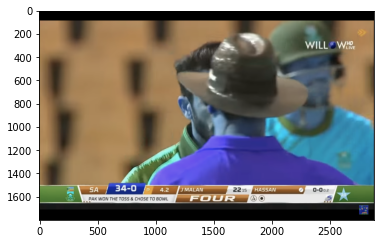

No umpire


In [23]:
import matplotlib.pyplot as plt

base_model = applications.vgg19.VGG19(include_top=True, weights='imagenet', input_tensor=None,
                                      input_shape=None, pooling=None, classes=1000)
model_load_path='/content/drive/MyDrive/Capstone_606/Features'

model = Model(base_model.input, base_model.get_layer('fc1').output)
loaded_model1 = pickle.load(open('//content/drive/MyDrive/Capstone_606/Features/Models/new_binary_class_vgg19model_svm.sav', 'rb'))
img = cv2.imread('/content/drive/MyDrive/Capstone_606/Data/validate_img/Screen Shot 2021-04-14 at 2.51.50 PM.png')
plt.imshow(img)
plt.show()
img1 = cv2.resize(img, (224, 224))
img_array=img_preProcess(img1)
features = model(img_array) 
predicted_values = loaded_model1.predict(features)
if predicted_values==[1]:
  print('No umpire')
else:
  print("Umpire")

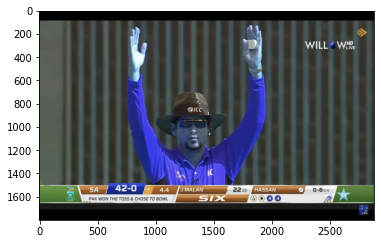

six:


In [22]:
import cv2
import matplotlib.pyplot as plt

base_model = applications.vgg19.VGG19(include_top=True, weights='imagenet', input_tensor=None,
                                      input_shape=None, pooling=None, classes=1000)
model_load_path='/content/drive/MyDrive/Capstone_606/Features'

model = Model(base_model.input, base_model.get_layer('fc1').output)
loaded_model2 = pickle.load(open('/content/drive/MyDrive/Capstone_606/Features/Models/new_multi_class_vgg19model_vgg19_svm.sav', 'rb'))
img = cv2.imread('/content/drive/MyDrive/Capstone_606/Data/validate_img/validate_img.jpg')
plt.imshow(img)
plt.show()
img1 = cv2.resize(img, (224, 224))
img_arra=img_preProcess(img1)
features = model(img_arra) 
predicted_values_2 = loaded_model2.predict(features)
choices = {'1':'noball', '2':'out', '3':'six', '4':'wide', '5':'noaction'}
result = choices.get(np.str(int(predicted_values_2)), 'default')
if result == 'noball':
  print('noball:')
if result == 'out':
  print('out:')
if result == 'six':
  print('six:')
if result == 'wide':
  print('wide:')
if result == 'noaction':
  print('noaction:')